
# Diabetes Health Indicators Dataset

The purpose of this code notebook is to clean and prepare the BRFSS data into a useable format to predict the accuracy if a person might have diabetes or is at risk of diabetes by finding out what risk factors are the most predictive of diabetic risk.

The dataset is from kaggle. This project will be using only the diabetes_binary_5050split_health_indicators_BRFSS2015.csv. This is a clean dataset of 70692 survey responses to CDC's BRFSS2015. It has a 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classs. 0 is for no diabetes and 1 is for prediabetes or diabetes. It has 22 feature variables and is balanced.

Based on the diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions, only select features are included in this analysis.

Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease. The following are the selected subset of features from BRFSS 2015.

- diabetes binary (0 = no diabetes; 1 = prediabetes/diabetes)
- high blood pressure (0 = no high BP; 1 = high BP)
- high cholesterol (0 = no high cholesterol; 1 = high cholesterol)
- cholesterol check (0 = no choesterol check in 5 years; 1 = yes cholesterol check in 5 years)
- BMI (body mass index)
- smoker (smoke at least 100 cigarettes in entire life; 5 packs = 100 cigarettes; 0 = no; 1 = yes)
- stroke (ever told had a stroke; 0 = no; 1 = yes)
- heart disease or attack (coronary heart disease(CHD) or myocardial infarction(MI); 0 = no; 1 = yes)
- physical activity (in past 30 days not including job; 0 = no; 1 = yes))
- fruits (consumed 1 or more times per day; 0 = no; 1 = yes)
- veggies (consumed 1 or more times per day; 0 = no; 1 = yes)
- heavy alcohol consumption (adult men =>14 drinks per week; adult women =>7 drinks per week; 0 = no; 1 = yes)
- any healthcare (any kind of healthcare coverage including health insurance, prepaid plans (HMO etc); 0 = no; 1 = yes)
- no doctor because of cost (past 12 months when needed to see doctor but could not because of cost; 0 = no; 1 = yes)
- general health (general health 5 scale; 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor)
- mental health (days of poor mental health 1-30 days)
- physical health (physical illness or injury days in past 30 days scale of 1-30)
- difficulty walking (have serious difficulty walking or climbing stairs; 0 = no; 1 = yes)
- sex (0 = female; 1 = male)
- age (14 level age category; 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80 or>; 14 = not know/not sure/refused/missing)
- education (scale 1-6, 9); 1 = never attended school or only kindergarten; 2 = elementary; 3 = some high school; 4 = high school graduate; 5 = some college; 6 = college graduate or more; 9 = refused)
- income (scale 1-8; 1 = <10K; 2 = <15K; 3 = <20K; 4 = <25K; 5 = <35K; 6 = <50K; 7 = <75K; 8 = >75K or more; 77 = not know/not sure; 99 = refused)
  
The selected subset of features (columns from the dataset) from BRFSS 2015 was further investigated for additional information in order to understand the meaning of the data gathered from the BRFSS 2015 codebook from the survey.

Additional information about the BRFSS 2015 codebook and relevant paper are as follows:

BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.html

## PART THREE

## PRE-PROCESSING AND TRAINING DATA DEVELOPMENT

In this section:  We will be preparing the data for fitting models. We will create dummy features to allow for the inclusion of those features in our model development. 

Remember the question we are trying to answer: Finding out what risk factors are the most predictive of diabetic risk.

Pre-Processing and  Training Data Development Task:

1. Create a dummy or indicator features for categorical variables. Use get_dummies().
2. Standardize the magnitude of numeric features using a scaler. Make a scaler object and fit the data to the scaler object.
3. Split into a testing and training datasets.

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import glob
import random
random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

from colorama import Fore, Back, Style
import statsmodels.stats.weightstats as ws
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

This is the best place to put all the libraries needed for the project.

In [2]:
#read in the dataset (select 2015)
brfss2015_dataset = pd.read_csv('BRFSSdata/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

The dataset is imported from the source: kaggle using the pd.read_csv.

In [3]:
#use replace NaN with empty string using replace()function [df.replace(np.nan, '' or '-')]
data = brfss2015_dataset.apply(pd.value_counts).T
data.replace(np.nan, '-')

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,82.0,83.0,84.0,85.0,86.0,87.0,89.0,92.0,95.0,98.0
Diabetes_binary,35346.0,35346.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HighBP,30860.0,39832.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HighChol,33529.0,37163.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
CholCheck,1749.0,68943.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
BMI,-,-,-,-,-,-,-,-,-,-,...,11.0,1.0,13.0,1.0,1.0,13.0,4.0,9.0,4.0,4.0
Smoker,37094.0,33598.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Stroke,66297.0,4395.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HeartDiseaseorAttack,60243.0,10449.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
PhysActivity,20993.0,49699.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Fruits,27443.0,43249.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


NaN values or '-' are not applicable, most of the values are 0 and 1 representing yes/no values.

In [4]:
df =brfss2015_dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

There  are 22 columns in the dataset. Some of the features consist of zeros and ones. Some needs to be aggregated into smaller number of categories.

From the previous EDA done. For PhysHlth and MentHlth, we are aggregating into smaller number of categories for eventual one-hot encoding.

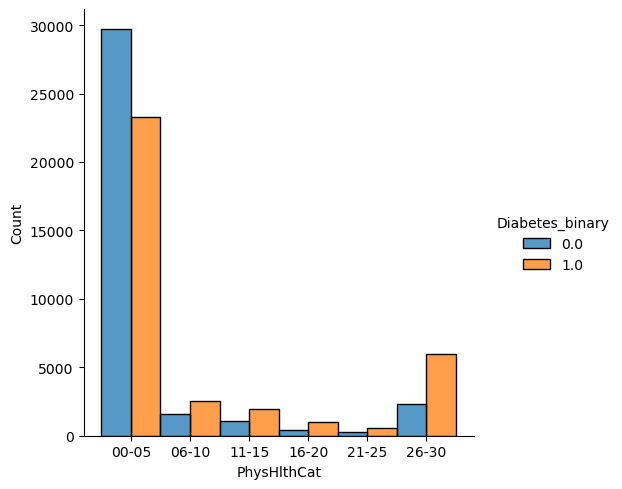

In [5]:
#Aggregated categories of PhysHlt; Simplified categories from 30 to 6 categories within a single data
df['PhysHlthCat'] = '00-05'
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 6) & (df['PhysHlth'] <= 10)) , '06-10', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 11) & (df['PhysHlth'] <= 15)) , '11-15', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 16) & (df['PhysHlth'] <= 20)) , '16-20', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 21) & (df['PhysHlth'] <= 25)) , '21-25', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 26) & (df['PhysHlth'] <= 30)) , '26-30', df['PhysHlthCat'])
df.sort_values(by=['PhysHlthCat'], inplace=True)
df.drop(labels='PhysHlth', axis=1, inplace=True)
sns.displot(df, x='PhysHlthCat', hue='Diabetes_binary', multiple="dodge")

In [6]:
#Aggregated categories of MentHlt; Simplified categories from 30 to 6 categories within a single data
df['MentHlthCat'] = '00-05'
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 6) & (df['MentHlth'] <= 10)) , '06-10', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 11) & (df['MentHlth'] <= 15)) , '11-15', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 16) & (df['MentHlth'] <= 20)) , '16-20', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 21) & (df['MentHlth'] <= 25)) , '21-25', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 26) & (df['MentHlth'] <= 30)) , '26-30', df['MentHlthCat'])
df.sort_values(by=['MentHlthCat'], inplace=True)
df.drop(labels='MentHlth', axis=1, inplace=True)
sns.displot(data=df, x='MentHlthCat', hue='Diabetes_binary', multiple="dodge")

We assessed that majority of the data are binary and are categorical data.
We will create dummy or indicator features for categorical data.

In [7]:
# OneHotEncoding of the categorical data
df_new = pd.get_dummies(df, columns=['GenHlth', 'MentHlthCat', 'PhysHlthCat', 'Age', 'Education', 'Income'])
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


The BMI data needs to undergo min/max scaling to make it consistent with the categorical data.

Scaling the BMI data to reduce the possible overemphasizing of the BMI data in the modeling.

In [8]:
#Scaling the data; Only BMI will get scaled due to the other columns are categorical and have zero and one values
cols=df_new.columns
# retrieve just the numeric input values
data = df_new.values[:, :]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
df_new = DataFrame(data)
df_new.set_axis(cols[:], axis=1, inplace=True)
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.000000,0.500000,1.000000,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.000000,1.000000,1.000000,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.000000,1.000000,1.000000,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.000000,1.000000,1.000000,1.0
BMI,70692.0,0.207639,0.082720,0.0,0.151163,0.197674,0.244186,1.0
Smoker,70692.0,0.475273,0.499392,0.0,0.000000,0.000000,1.000000,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.000000,0.000000,0.000000,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.000000,0.000000,0.000000,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.000000,1.000000,1.000000,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.000000,1.000000,1.000000,1.0


Splitting the data into training and testing datasets in preparation to modeling.
Our y variable is Diabetes_binary.

In [9]:
dfy = df_new['Diabetes_binary']
dfX = df_new.copy()
dfX.drop('Diabetes_binary', axis=1, inplace=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(dfX, dfy,
                                                train_size = 0.80,
                                                random_state = 42)

In [11]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(56553, 59) (14139, 59) (56553,) (14139,)


SUMMARY

The following tasks were performed:


We start with importing the libraries needed for pre-processing. Downloaded the dataset brfss2015.

Rechecked dataset for NaN values replaced with '-'. Reviewed the columns of the dataset and some features consisted of zeros and ones and some of the column values needed to be aggregated into smaller number of categories prior to one-hot endocding.

The majority of the data are binary and categorical. Used the get_dummies() to create dummy or indicator features for categorical data.

Next step, scaling of the data using MinMaxScaler and performed a robust scaler fit_transform on the dataset in preparation to splitting the dataset. 

We chose the Diabetes_binary as our dependent variable. Train test split() applied to develop a training data which will be use as our original training set in preparation for modeling. We start with importing the libraries needed for pre-processing. Downloaded the dataset brfss2015.

Rechecked dataset for NaN values replaced with '-'. Reviewed the columns of the dataset and some features consisted of zeros and ones and some of the column values needed to be aggregated into smaller number of categories prior to one-hot endocding.

The majority of the data are binary and categorical. Use the get_dummies() to create dummy or indicator features for categorical data.

Next step, scaling of the data using MinMaxScaler and performed a robust scaler fit_transform the dataset in preparation to splitting the dataset. 

We chose the Diabetes_binary as our dependent variable. Train test split method is applied to develop a training data which is used in preparation for modeling. Train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data. This splitting approach whether 70/30 or 80/20 split is the general rule for an effective holdout test data for model validation. 

We used the 80/20 split in the model development dataset. We chose the Diabetes_binary as our dependent variable. 